In [ ]:
# install modules if they are not installed
!pip install -r requirements.txt

In [4]:
# import modules
import json
from pprint import pprint
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import fcluster

from sklearn.decomposition import PCA
from sklearn.neighbors import DistanceMetric
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics import pairwise_distances

# additional set up
%matplotlib inline
np.set_printoptions(precision=5, suppress=True) # suppress scientific float notation

# constants and parameters
DATA_PATH = './data/'
IMG_PATH = './'

# load data 
with open(f'{DATA_PATH}data_file_20181203.json') as f:
    data = json.load(f)

In [5]:
# create data frame
df = {'Name': np.zeros(len(data['quantlets'])), 
      'author_of_last_comm': np.zeros(len(data['quantlets'])),
      'is_debuggable': np.zeros(len(data['quantlets'])), 
      'grade': np.zeros(len(data['quantlets'])),
      'keywords': np.zeros(len(data['quantlets']))}

df = pd.DataFrame(data=df)

In [6]:
# extract the columns we need
counter=0
for c, i in enumerate(data['quantlets']):
    print(i)
    df.loc[c,'Name'] = i
    df.loc[c,'author_of_first_comm'] = data['quantlets'][i]['commit_first']['commit']['author']['name']
    df.loc[c,'author_of_last_comm'] = data['quantlets'][i]['commit_last']['commit']['author']['name']
    df.loc[c,'is_debuggable'] = data['quantlets'][i]['is_debuggable']
    try:
        df.loc[c,'grade'] = data['quantlets'][i]['grade']
        df.loc[c,'keywords'] = ' '.join(str(e) for e in set(data['quantlets'][i]['keyword_list']))
    except:
        df.loc[c,'grade'] = 'did not work'
        df.loc[c,'keywords'] ='did not work'
        counter+=1
print(f'Could not load {counter} quantlets.')
df = df[df['is_debuggable']==True]

ADM/HermPolyPlot/Metainfo.txt
ARR/ARRboxage/Metainfo.txt
ARR/ARRboxgscit/Metainfo.txt
ARR/ARRboxhb/Metainfo.txt
ARR/ARRcormer/Metainfo.txt
ARR/ARRdenmer2d/Metainfo.txt
ARR/ARRdenmer3d/Metainfo.txt
ARR/ARRhexage/Metainfo.txt
ARR/ARRhexcit/Metainfo.txt
ARR/ARRhexhin/Metainfo.txt
ARR/ARRhismer/Metainfo.txt
ARR/ARRmosage/Metainfo.txt
ARR/ARRmosagegr/Metainfo.txt
ARR/ARRmossub/Metainfo.txt
ARR/ARRpcpgscit/Metainfo.txt
ARR/ARRpcphb/Metainfo.txt
ARR/ARRpcpmer/Metainfo.txt
ARR/ARRpcprp/Metainfo.txt
ARR/ARRqrqqhb/Metainfo.txt
ARR/ARRscaage/Metainfo.txt
ARR/ARRscamer/Metainfo.txt
Adaptive_Penalized_Macro_Factors/Metainfo.txt
BCS-1/BCS_Kernel_nhTemp/Metainfo.txt
BCS-1/BCS_MLRleaps/Metainfo.txt
BCS-1/BCS_RANDU/Metainfo.txt
BCS/BCS_ARM/MetaInfo.txt
BCS/BCS_ArchimedeanContour/MetaInfo.txt
BCS/BCS_BarGraphs/MetaInfo.txt
BCS/BCS_Bincdf/MetaInfo.txt
BCS/BCS_Binhist/MetaInfo.txt
BCS/BCS_Binhyper/MetaInfo.txt
BCS/BCS_Binnorm/MetaInfo.txt
BCS/BCS_BinormalDensity/MetaInfo.txt
BCS/BCS_Binpdf/MetaInfo.txt
BC

FPCA_Electricity/FPCA_Electricity_Surface/Metainfo.txt
FRM/FRM_GT/Metainfo.txt
FRM/FRM_SRISK/Metainfo.txt
FRM/FRM_VIX/Metainfo.txt
FRM/FRM_compare_nf/Metainfo.txt
FRM/FRM_compare_of/Metainfo.txt
FRM/FRM_compare_ws/Metainfo.txt
FRM/FRM_download_data/Metainfo.txt
FRM/FRM_lambda_series/Metainfo.txt
FRM/FRM_parallel_compute/Metainfo.txt
FRM/FRM_per_cap/Metainfo.txt
FVC/FVCConvNet/metainfo.txt
FVC/FVCEurostoxxLDA/metainfo.txt
FVC/FVCEurostoxxOLS/metainfo.txt
FVC/FVCEurostoxxPLS/metainfo.txt
FVC/FVCbarplot/metainfo.txt
FVC/FVCcall_API/metainfo.txt
FVC/FVCconf_API/metainfo.txt
FVC/FVCconf_CNN/metainfo.txt
FVC/FVCconf_finetune/metainfo.txt
FVC/FVCcorr/metainfo.txt
FVC/FVCcorrcircle/metainfo.txt
FVC/FVCemo_vs_stock/metainfo.txt
FVC/FVCfinetuning/metainfo.txt
FVC/FVCheatmap/metainfo.txt
FVC/FVCload_dataset/metainfo.txt
FVC/FVCperformance/metainfo.txt
FVC/FVCpressdays/metainfo.txt
Face-Recognition/FaceRecognition_FLDA/MetaInfo.txt
Face-Recognition/FaceRecognition_PCA/MetaInfo.txt
Face-Recognition

MVA-ToDo/QID-2154-MVAppexample/Metainfo.txt
MVA-ToDo/QID-2159-MVAfactcarm/Metainfo.txt
MVA-ToDo/QID-2298-MVAboxbhd/Metainfo.txt
MVA-ToDo/QID-2344-MVAaerbh/Metainfo.txt
MVA-ToDo/QID-2426-MVAbluepullover/Metainfo.txt
MVA-ToDo/QID-2427-MVAboshousing/Metainfo.txt
MVA-ToDo/QID-2428-MVAboxbank1/Metainfo.txt
MVA-ToDo/QID-2453-MVAandcur/Metainfo.txt
MVA-ToDo/QID-2454-MVAaper/Metainfo.txt
MVA-ToDo/QID-2455-MVAbankrupt/Metainfo.txt
MVA-ToDo/QID-2511-MVAnpcafood/Metainfo.txt
MVA-ToDo/QID-2564-PAVAlgo/Metainfo.txt
MVA-ToDo/QID-757-MVAcarrankings/Metainfo.txt
MVA-ToDo/QID-904-MVAppsib/Metainfo.txt
MVA-ToDo/QID-928-MVAdisfbank/Metainfo.txt
MVA-ToDo/QID-930-MVAMDScity1/Metainfo.txt
MVA-ToDo/QID-931-MVAMDScity2/Metainfo.txt
MVA-ToDo/QID-932-MVAMDSnonmstart/Metainfo.txt
MVA-ToDo/QID-933-MVAMDSpooladj/Metainfo.txt
MVA-ToDo/QID-934-MVAnmdscar1/Metainfo.txt
MVA-ToDo/QID-935-MVAnmdscar2/Metainfo.txt
MVA-ToDo/QID-936-MVAnmdscar3/Metainfo.txt
MVA-ToDo/QID-941-MVAprofil/Metainfo.txt
MVA-ToDo/QID-942-MVAdenban

SFE/QID-2285-SFEvar_block_max_backtesting/Metainfo.txt
SFE/QID-2287-SFEvar_block_max_params/Metainfo.txt
SFE/QID-2292-SFEvar_pot_backtesting/Metainfo.txt
SFE/QID-2293-SFEvar_pot_params/Metainfo.txt
SFE/QID-2306-SFEPortfolioLossDensity/Metainfo.txt
SFE/QID-2368-ETL/Metainfo.txt
SFE/QID-2369-SFEETLGaussTr1/Metainfo.txt
SFE/QID-2385-SFEbaseCorr/Metainfo.txt
SFE/QID-2386-BaseCorrGaussModelCDO/Metainfo.txt
SFE/QID-2387-lowerTrLossGauss/Metainfo.txt
SFE/QID-2388-SFEcompCorr/Metainfo.txt
SFE/QID-2446-SFESpecWN/Metainfo.txt
SFE/QID-2456-SFEFreqFilt/Metainfo.txt
SFE/QID-2457-SFEPer/Metainfo.txt
SFE/QID-2594-SFEArchCopDensity/Metainfo.txt
SFE/QID-3125-SFEDAXlogreturns/Metainfo.txt
SFE/QID-3126-SFEDeltahedgingdepend/Metainfo.txt
SFE/QID-3143-SFEdown-and-out/Metainfo.txt
SFE/QID-3144-SFEdvegadtime/Metainfo.txt
SFE/QID-3145-SFEevt1/Metainfo.txt
SFE/QID-3146-SFEevt2/Metainfo.txt
SFE/QID-3147-SFEexerput/Metainfo.txt
SFE/QID-3148-SFEReturns/Metainfo.txt
SFE/QID-3149-SFEVolaTermStructure/Metainfo.txt
S

SMS2/SMSsir2simu/Metainfo.txt
SMS2/SMSsircars/Metainfo.txt
SMS2/SMSsirsimu/Metainfo.txt
SMS2/SMSsiruscomp/Metainfo.txt
SMS2/SMSsvmbankrupt/Metainfo.txt
SMS2/SMSsvmorange/Metainfo.txt
SMS2/SMSsvmspiral/Metainfo.txt
SMS2/SMStestcov/Metainfo.txt
SMS2/SMStestcov4i/Metainfo.txt
SMS2/SMStestcovwais/Metainfo.txt
SMS2/SMStestsim/Metainfo.txt
SMS2/SMStestuscomp/Metainfo.txt
SPA/SPAdemoHUJapan/Metainfo.txt
SPA/SPAdemoLC/Metainfo.txt
SPA/SPAdemodescriptive/Metainfo.txt
SPA/SPAdemofcastaccuracy/Metainfo.txt
SPL/Currency Exchange Rate/SPL_Animation Choreopleth_Map/Metainfo.txt
SPL/Currency Exchange Rate/SPL_Animation_Dollar_and_EUR_signs/Metainfo.txt
SPL/Currency Exchange Rate/SPL_Animation_of_Currency_Exchange_Rate_Map/Metainfo.txt
SPL/Currency Exchange Rate/SPL_Descriptive_and_regression/Metainfo.txt
SPL/Currency Exchange Rate/SPL_Reading_in_Data/Metainfo.txt
SPL_class_SS17/SPL_HousePriceRegression_Data_Preprocessing/Metainfo.txt
SPL_class_SS17/SPL_HousePriceRegression_Exploratory_Data_Analysis/M

XFG/VaRcorrfDGF2/Metainfo.txt
XFG/VaRcumulantDG/Metainfo.txt
XFG/VaRcumulantsDG/Metainfo.txt
XFG/VaRestMC/Metainfo.txt
XFG/VaRqDG/Metainfo.txt
XFG/XFGELESC/Metainfo.txt
XFG/XFGIndustryBreakdown/Metainfo.txt
XFG/XFGLSK/Metainfo.txt
XFG/XFGRegionsBreakdown/Metainfo.txt
XFG/XFGRsquared/Metainfo.txt
XFG/XFGSPDcb/Metainfo.txt
XFG/XFGSPDcb2/Metainfo.txt
XFG/XFGSPDcom/Metainfo.txt
XFG/XFGSPDoneday/Metainfo.txt
XFG/XFGSPDonemonth/Metainfo.txt
XFG/XFGSummary2/Metainfo.txt
XFG/XFGVaRcgfDGtest/Metainfo.txt
XFG/XFGVaRcharfDGtest/Metainfo.txt
XFG/XFGVaRestMC/Metainfo.txt
XFG/XFGcofi/Metainfo.txt
XFG/XFGdist/Metainfo.txt
XFG/XFGexc/Metainfo.txt
XFG/XFGexp_rtn_ES_2d/Metainfo.txt
XFG/XFGexp_rtn_SRM/Metainfo.txt
XFG/XFGexp_rtn_SRM_2d/Metainfo.txt
XFG/XFGexp_rtn_SRM_2d/XFGexp_rtn_ES_2d/Metainfo.txt
XFG/XFGexp_rtn_SRM_2d/XFGexp_rtn_SRM/Metainfo.txt
XFG/XFGiv00/Metainfo.txt
XFG/XFGiv02/Metainfo.txt
XFG/XFGiv03/Metainfo.txt
XFG/XFGiv04/Metainfo.txt
XFG/XFGiv05/Metainfo.txt
XFG/XFGiv06/Metainfo.txt
XFG/XFGp

In [7]:
# add HClustering
df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_image_example_km',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Computer vision image segmentation k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

df = df.append(pd.DataFrame({'Name' : 'DEDA_HClustering_quantlets',
                      'author_of_first_comm': 'Elizaveta Zinovyeva',
                      'author_of_last_comm': 'Elizaveta Zinovyeva',
                      'is_debuggable': True,
                      'grade': 'NA',
                      'keywords': 'Quantlets hierarchical k-means cluster analysis'}, index = [df.index.max()+1]), sort=False)

In [8]:
# text preprocessing
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df.keywords.values)
train_X = tokenizer.texts_to_sequences(df.keywords.values, )
train_X = [np.unique(i) for i in train_X]
train_X = pad_sequences(train_X, maxlen=15, padding='post')
#labels = [i.split('/')[1] for i in df.name]
labels = []
for i in df.Name:
    temp = str(i).split('/')
    if len(temp)==3:
        labels.append(temp[1])
    elif len(temp)==2:
        labels.append(temp[0])
    elif len(temp)==4:
        labels.append(temp[2])
    elif len(temp)==5:
        labels.append(' '.join([temp[0],temp[3]]))
    else:
        labels.append(i)

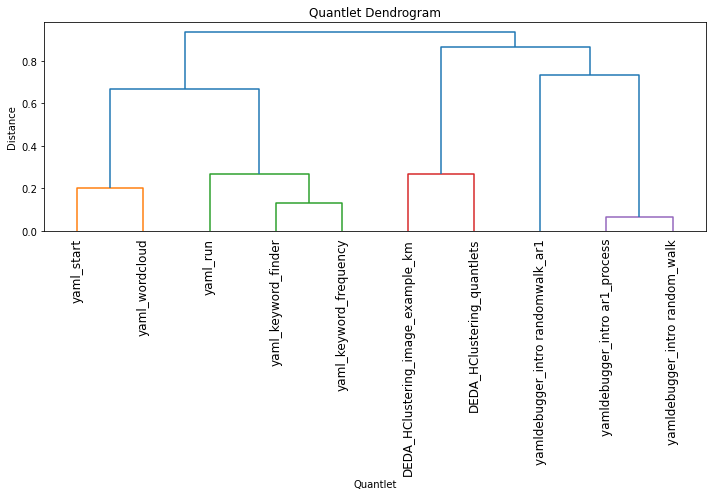

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X[-10:], method='single', metric='hamming')
dend = shc.dendrogram(Z, labels=labels[-10:], leaf_rotation=90) 
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_small.png', transparent=True)
d = pairwise_distances(train_X[-10:], metric='hamming')

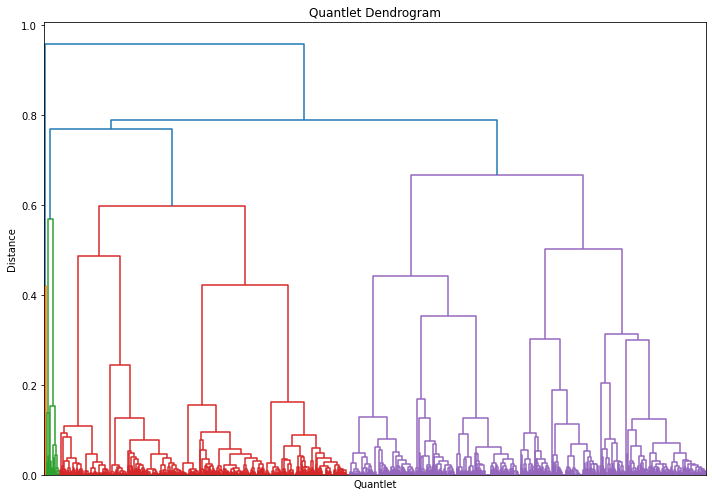

In [10]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X, method='average', metric='cosine')
dend = shc.dendrogram(Z, leaf_rotation=90, no_labels=True, count_sort=True)  
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_full.png', transparent=True)

In [11]:
clusters = fcluster(Z, 0.7, criterion='distance')

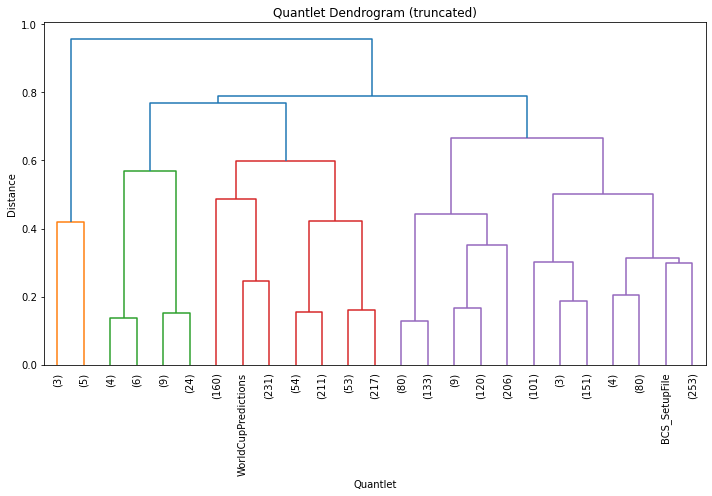

In [12]:
plt.figure(figsize=(10, 7))  
plt.title("Quantlet Dendrogram (truncated)")  
plt.xlabel('Quantlet')
plt.ylabel('Distance')
Z = shc.linkage(train_X,  method='average', metric='cosine')
dend = shc.dendrogram(Z, truncate_mode='lastp', p=25, labels=labels, leaf_rotation=90, count_sort=True)
plt.tight_layout()
plt.savefig(f'{IMG_PATH}dendr_trunc.png', transparent=True)

In [13]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

In [14]:
#Z = shc.linkage(train_X, method='average', metric='cosine')
max_d = 10
#clusters = fcluster(Z, max_d, criterion='maxclust')
cluster_labels = {}  
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)            

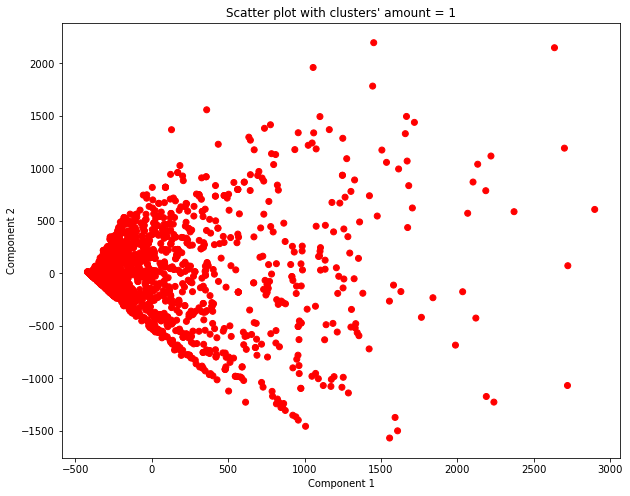

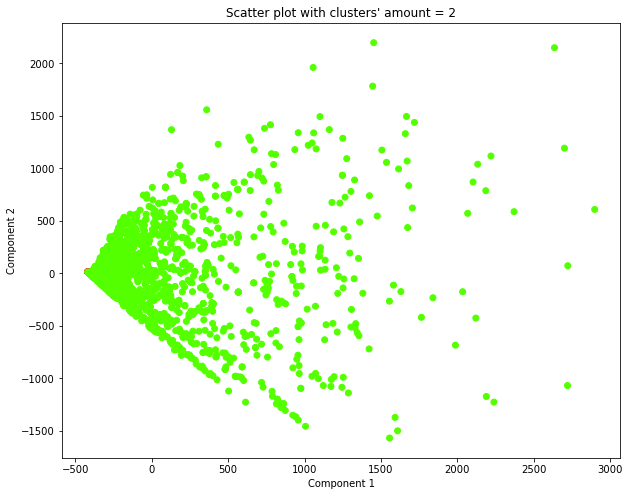

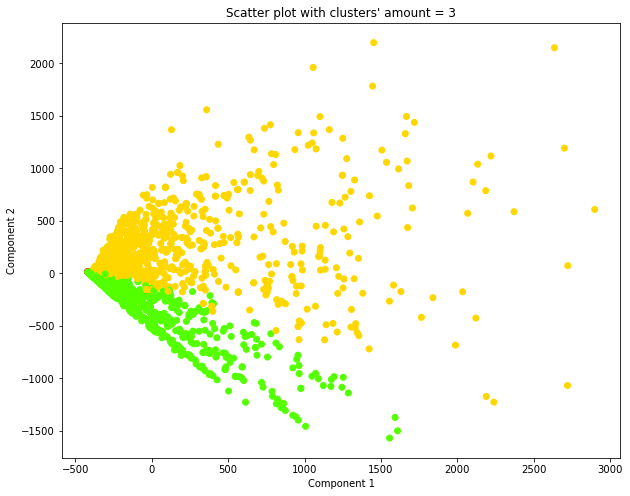

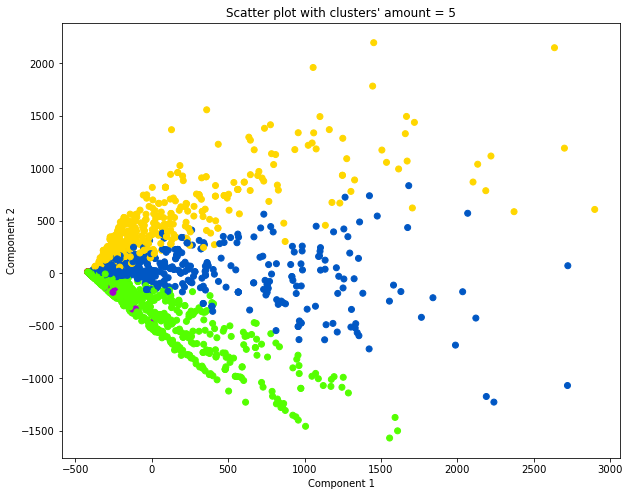

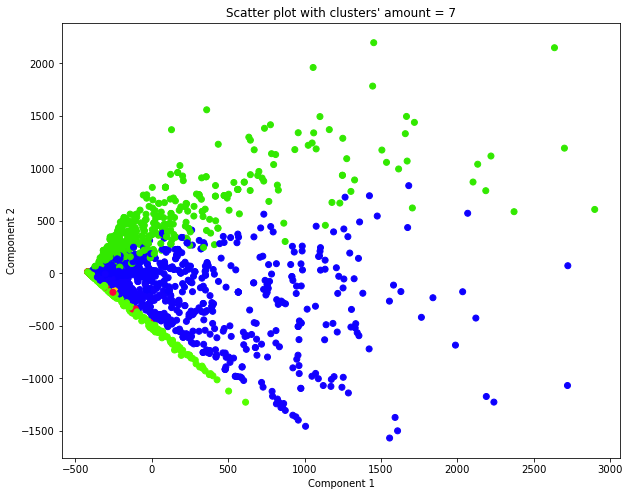

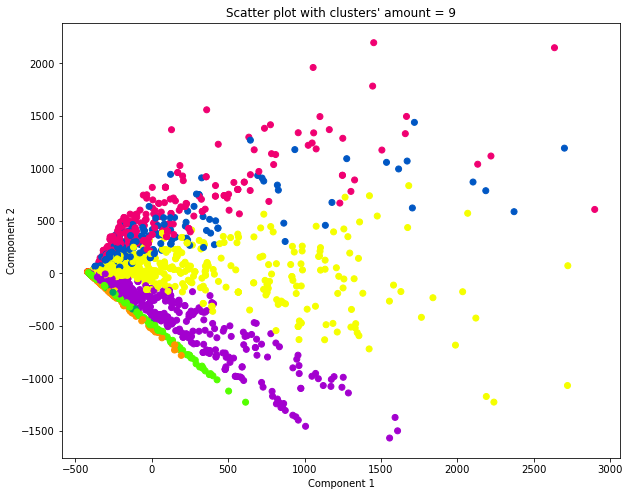

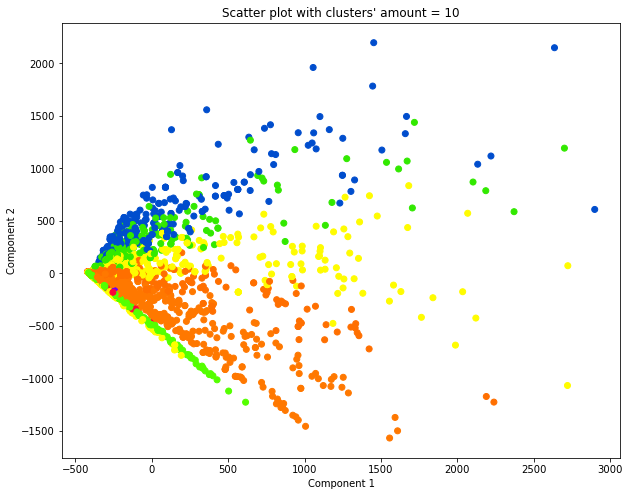

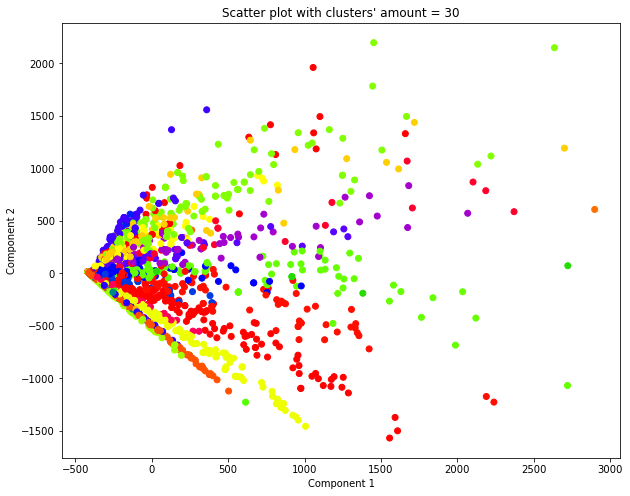

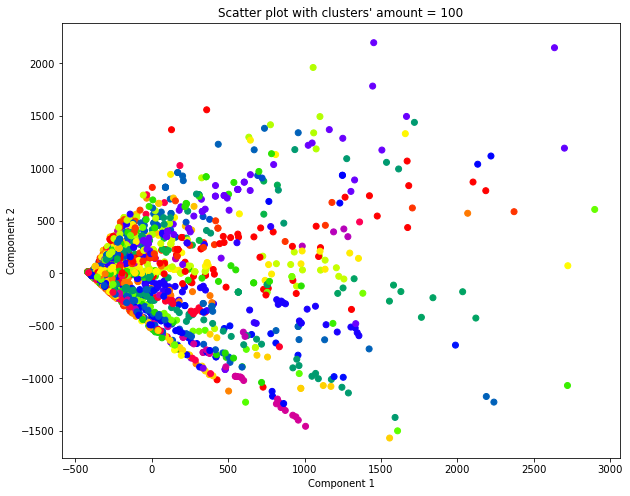

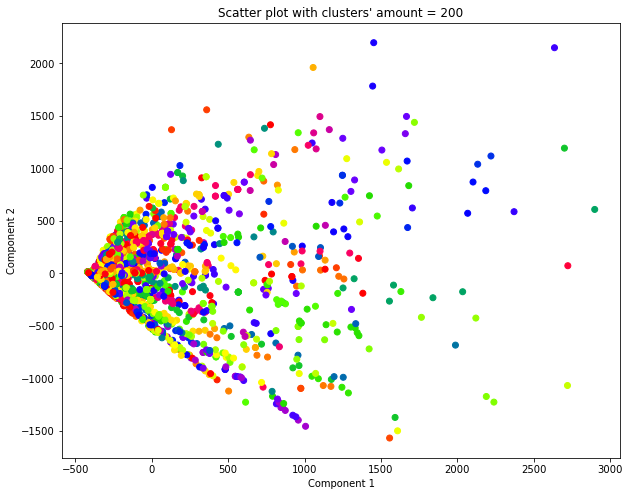

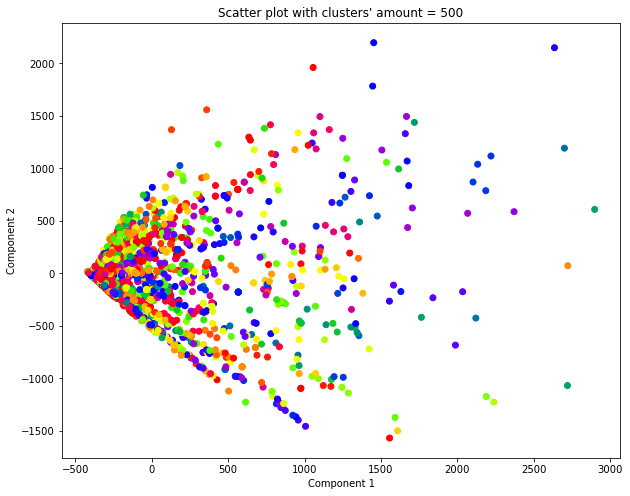

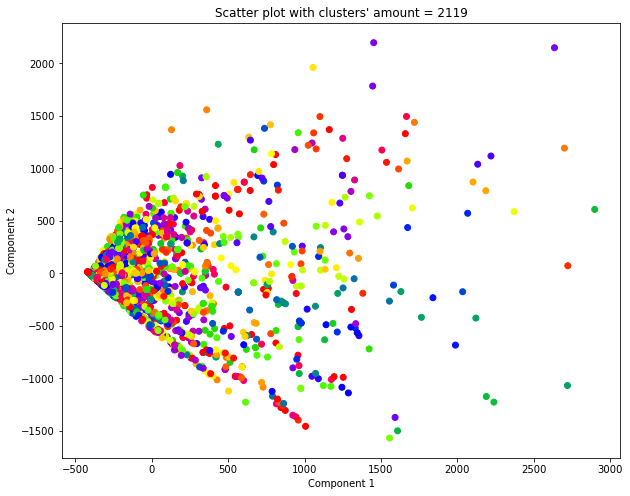

In [15]:
# prepare for plotting
pca = PCA(n_components=2)
pca.fit(train_X)
X = pca.transform(train_X)

for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X[:,0], X[:,1], c=clusters, cmap='prism')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'{IMG_PATH}/images/for_gif/step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

In [16]:
tsne = TSNE(n_components=2)
tsne.fit(train_X)
X_t = tsne.fit_transform(train_X)

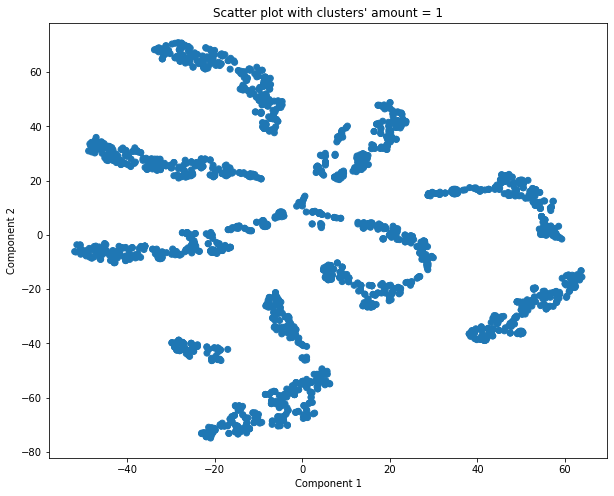

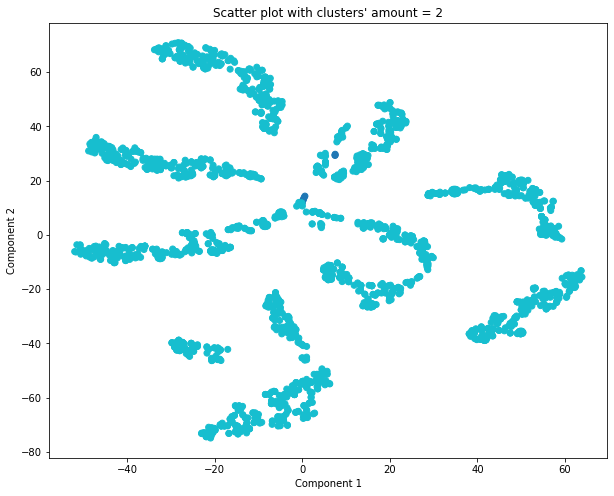

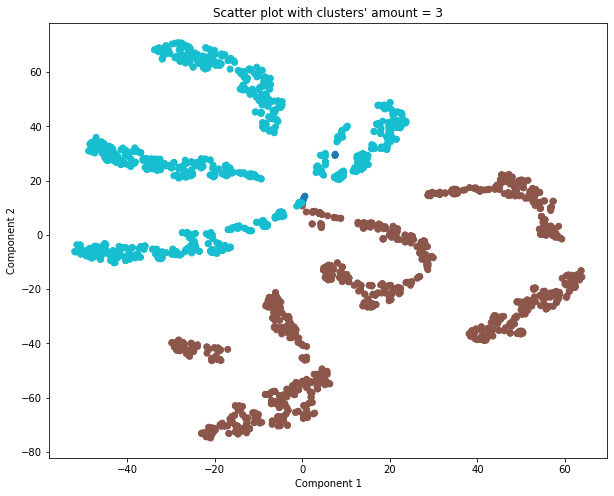

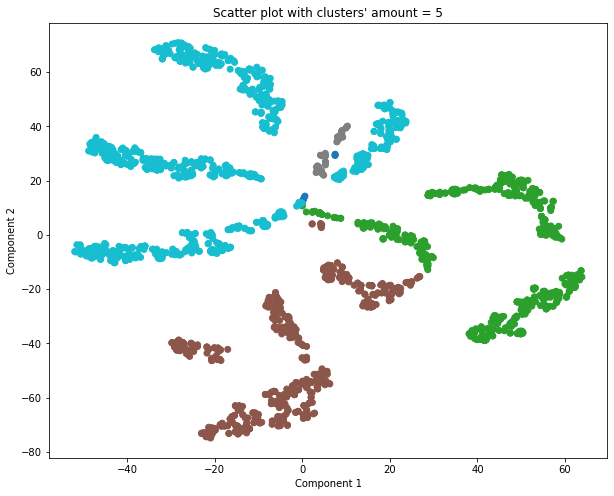

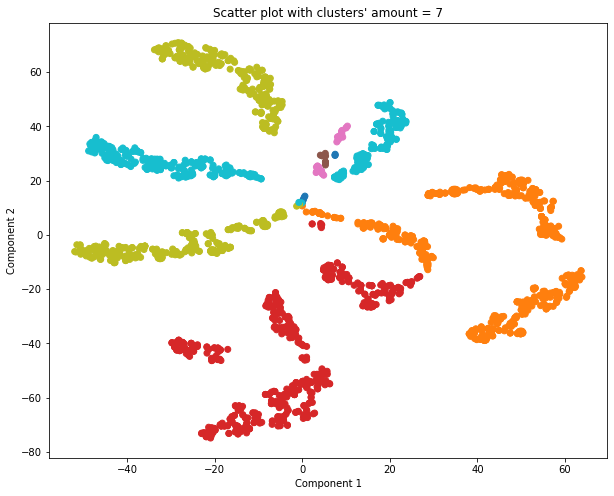

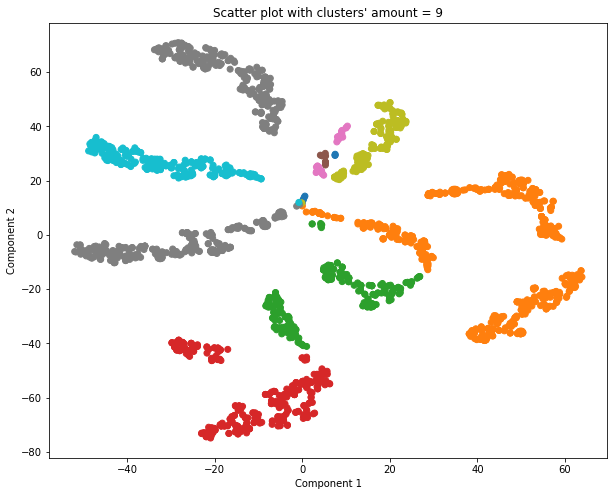

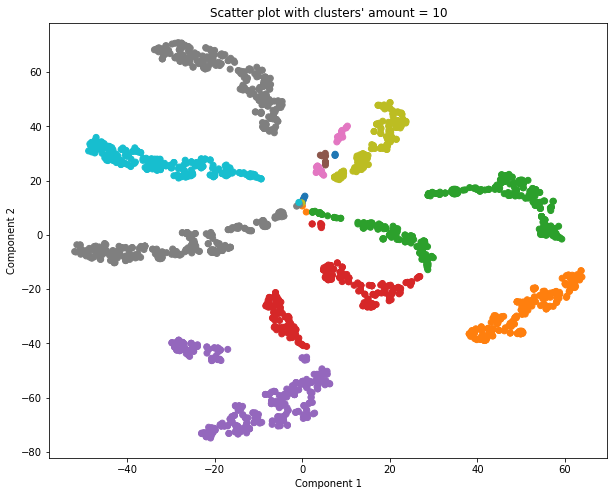

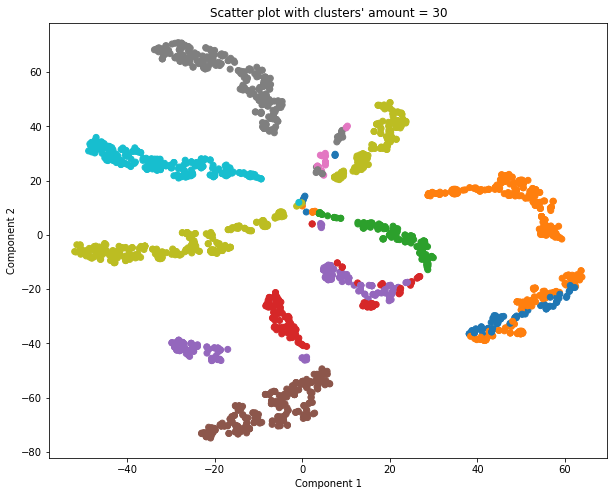

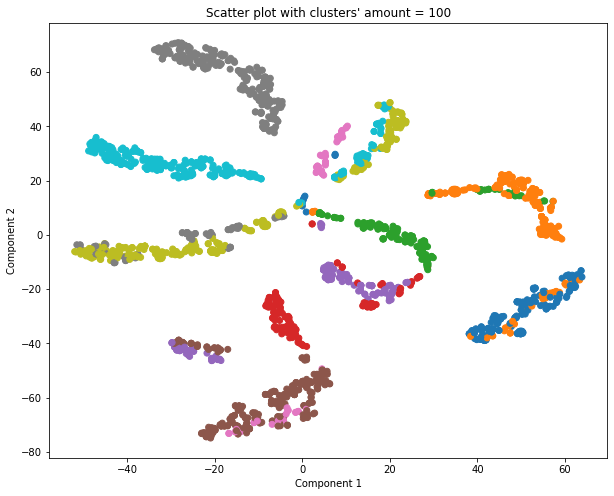

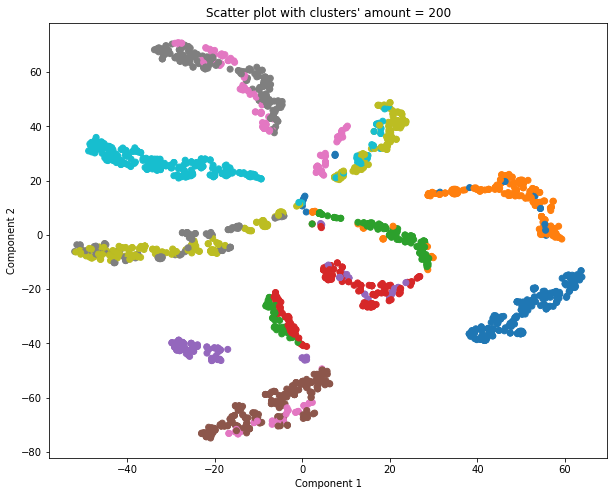

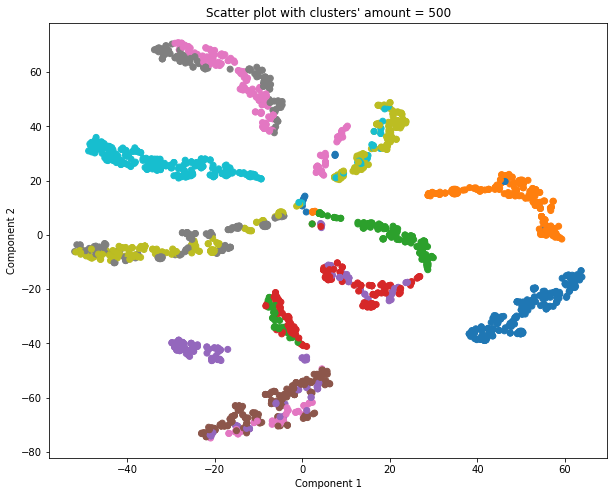

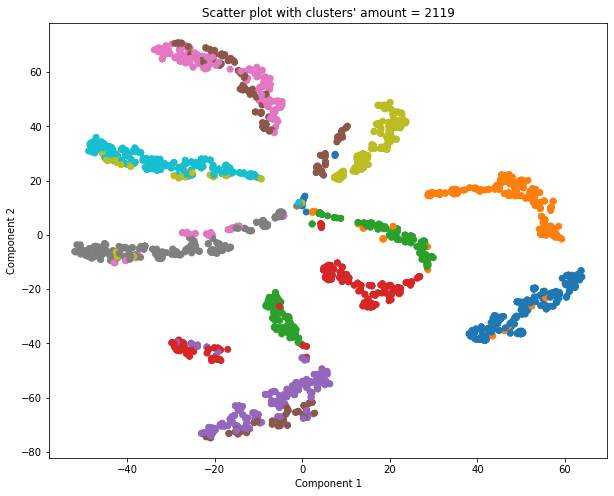

In [17]:
for i in [1, 2, 3, 5, 7, 9, 10, 30, 100, 200, 500, len(df.keywords)]:
    max_d = i
    clusters = fcluster(Z, max_d, criterion='maxclust')
    plt.figure(figsize=(10, 8))
    plt.scatter(X_t[:,0], X_t[:,1], c=clusters, cmap='tab10')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title(f'Scatter plot with clusters\' amount = {i}')
    filename=f'{IMG_PATH}/images/for_gif/TSNE_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96, transparent=True)
    plt.gca()

In [18]:
max_d

2119

In [19]:
cluster_labels

{1: 'density kernel plot var algorithm networks animation hash worldmap',
 2: 'plot representation graphical data visualization financial series time estimation',
 3: 'distribution volatility stable estimation model regression autoregressive markov plot',
 4: 'plot graphical representation visualization distribution financial regression data time',
 5: '',
 6: '',
 7: '',
 8: '',
 9: '',
 10: ''}

<AxesSubplot:title={'center':"Scatter plot with clusters' amount = 10"}, xlabel='Component 1', ylabel='Component 2'>

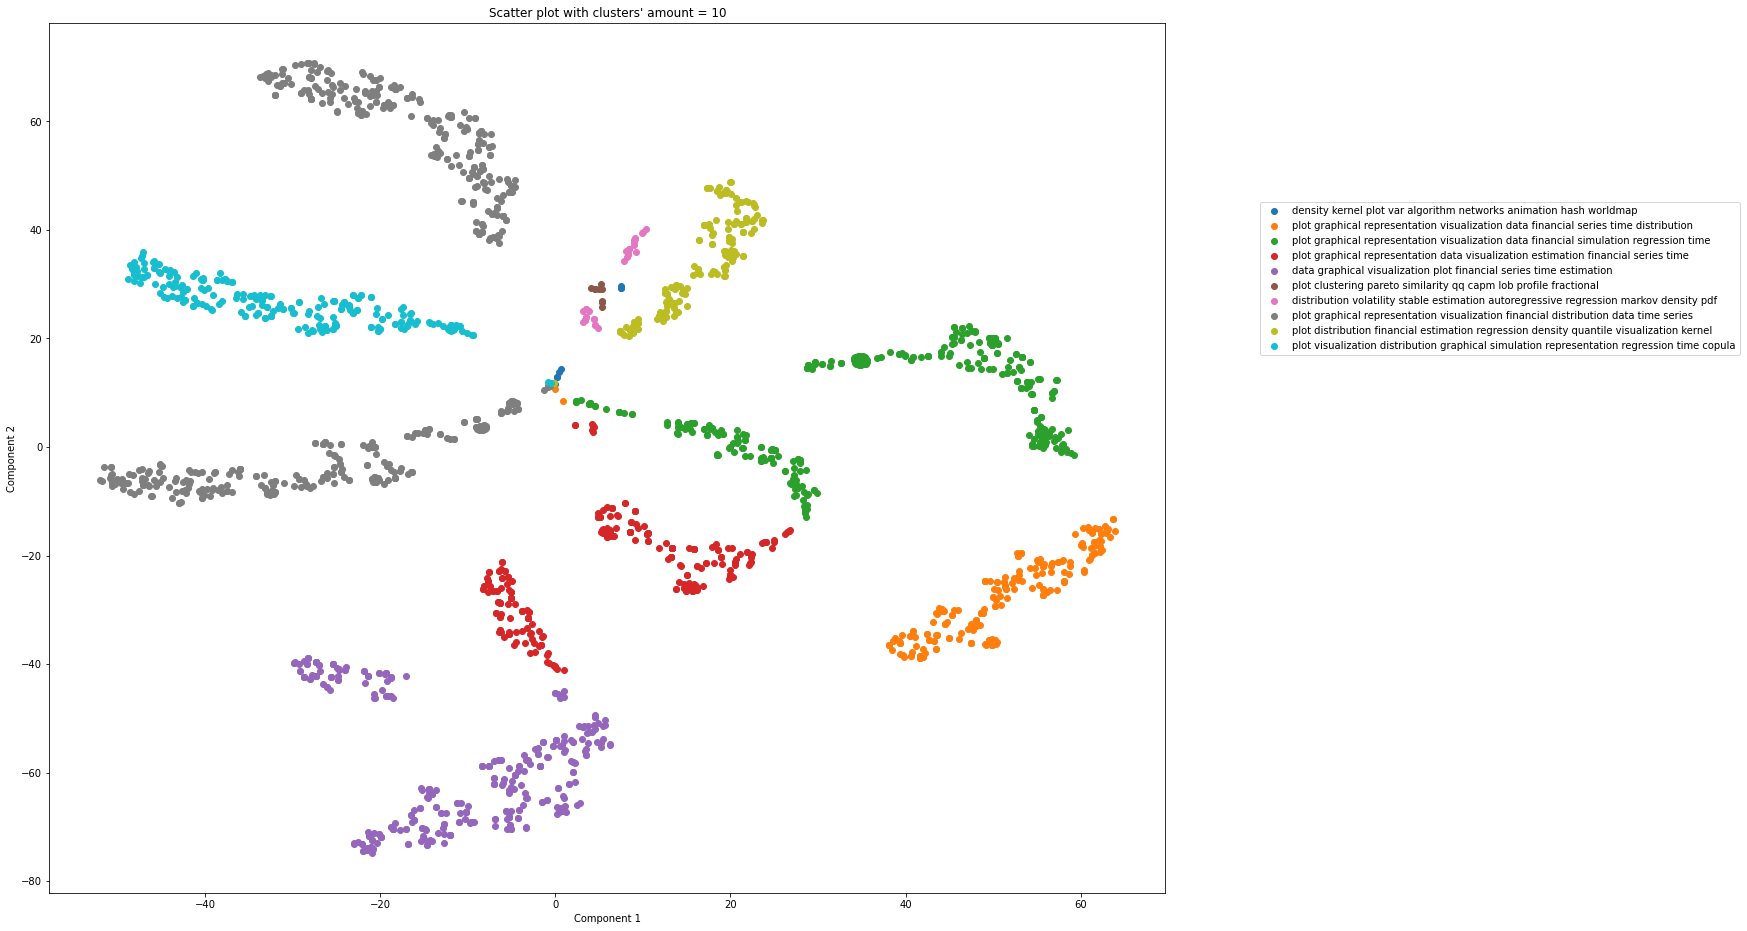

In [20]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(20, 16))
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)       
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], label = cluster_labels[i])
#plt.legend(loc = 'upper left', prop={'size': 10})
plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {10}')
filename=f'{IMG_PATH}TSNE_10_clusters.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()

<AxesSubplot:title={'center':"Scatter plot with clusters' amount = 10"}, xlabel='Component 1', ylabel='Component 2'>

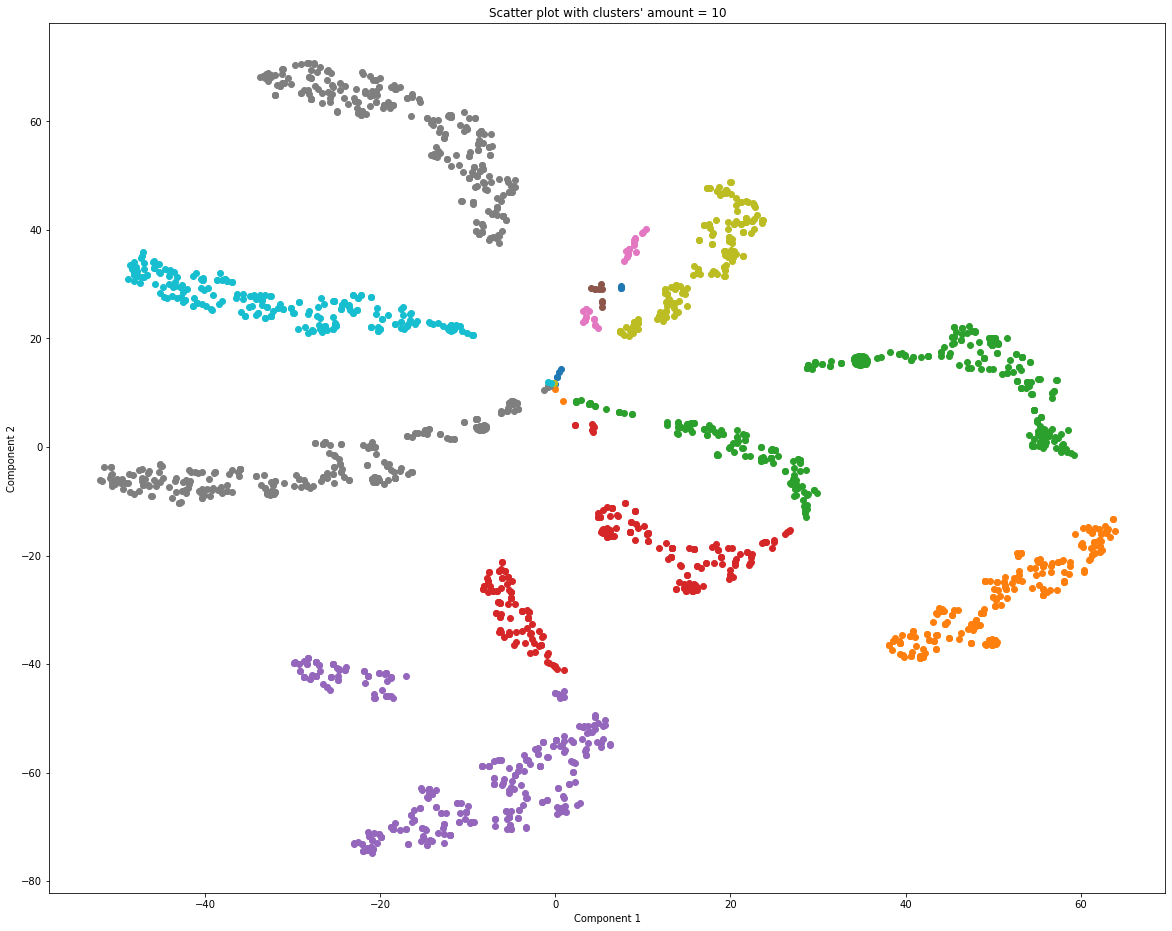

In [21]:
max_d=10
clusters = fcluster(Z, max_d, criterion='maxclust')
plt.figure(figsize=(20, 16))
for i in range(1, max_d+1):
    df_ = pd.DataFrame(columns = ['word', 'count'])
    df_['word'], df_['count'] = np.unique(train_X[clusters==i], return_counts=True)
    df_ = df_.sort_values(by=['count'], ascending=False)
    #print(df.head(20))
    temp = []
    for word in df_.word.values[1:10]:
        if word != 0:
            temp.append(reverse_word_map[word])
    cluster_labels[i] = ' '.join(temp)       
    plt.scatter(X_t[clusters==i,0], X_t[clusters==i,1], label = cluster_labels[i])
#plt.legend(loc = 'upper left', prop={'size': 10})
#plt.legend(loc='upper center', bbox_to_anchor=(1.3, 0.8), prop={'size': 10})
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title(f'Scatter plot with clusters\' amount = {10}')
filename=f'{IMG_PATH}TSNE_10_clusters.png'
plt.savefig(filename, dpi=96, transparent=True)
plt.gca()